In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

In [7]:
# get data
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)

# get team names
team1, team2 = df.team_name.unique()

# get shots df
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

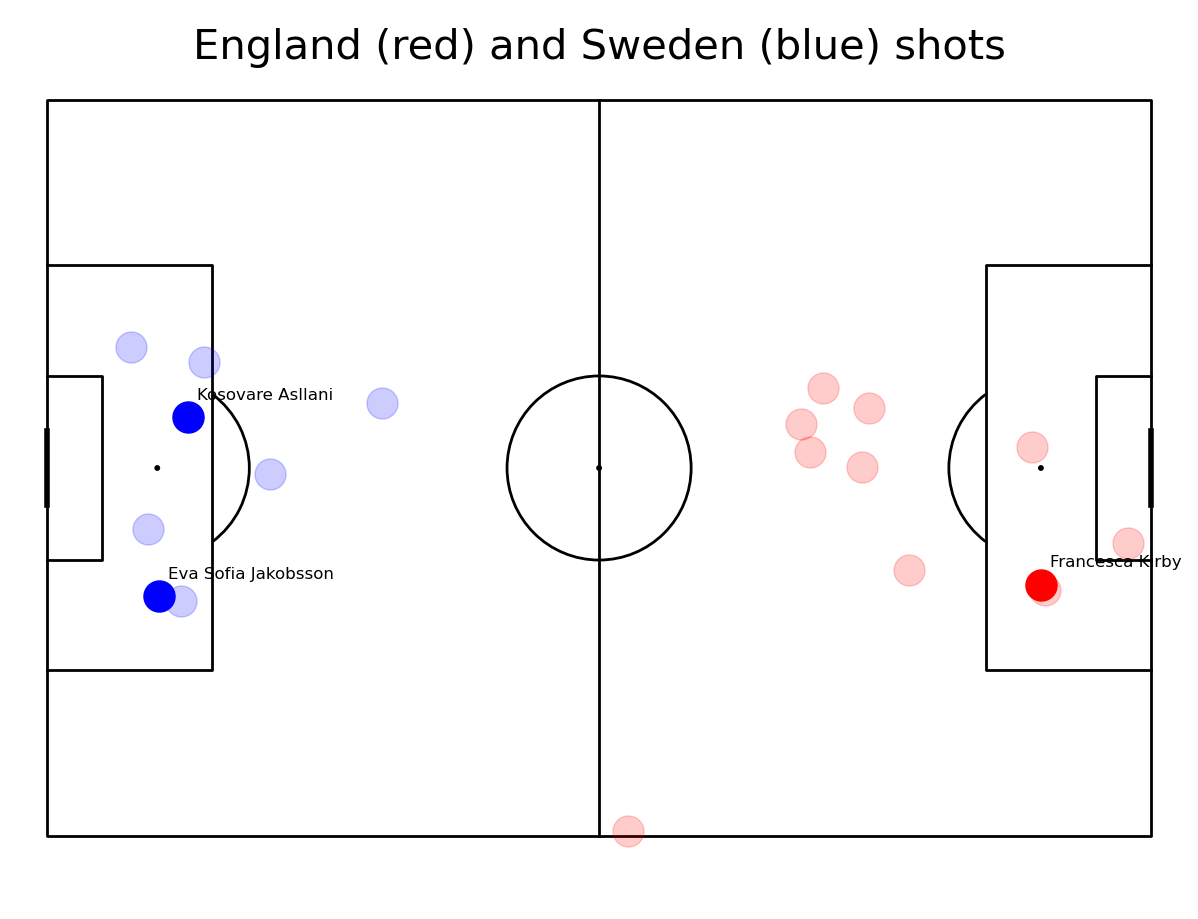

In [8]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#query
mask_england = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_england = df.loc[mask_england, ['x', 'y', 'outcome_name', "player_name"]]

#plot them - if shot ended with Goal - alpha 1 and add name
#for England
for i, row in df_england.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])

mask_sweden = (df.type_name == 'Shot') & (df.team_name == team2)
df_sweden = df.loc[mask_sweden, ['x', 'y', 'outcome_name', "player_name"]]

#for Sweden we need to revert coordinates
for i, row in df_sweden.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])

fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 30)
plt.show()